In [88]:
5+5

10

In [89]:

import numpy

In [90]:
import pandas as pd 


In [91]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_ae743778b7444c53a507cd95b0ad7ecd = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_ae743778b7444c53a507cd95b0ad7ecd = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_ae743778b7444c53a507cd95b0ad7ecd = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='4XaA0Awm6wo3ruOBDt6g-qpG50YzXPn3GDSN96oaheD7',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_ae743778b7444c53a507cd95b0ad7ecd)

body = client_ae743778b7444c53a507cd95b0ad7ecd.get_object(Bucket='health1-donotdelete-pr-bzdopbktc3euxx',Key='insurance-Copy1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
body = client_ae743778b7444c53a507cd95b0ad7ecd.get_object(Bucket='health1-donotdelete-pr-bzdopbktc3euxx',Key='insurance-Copy1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [93]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.patches as mpatches


In [94]:
df_data_2.describe()



,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [95]:
df_data_2.shape

(1338, 7)

In [96]:
df_data_2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [97]:
df_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [98]:
df_data_2.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

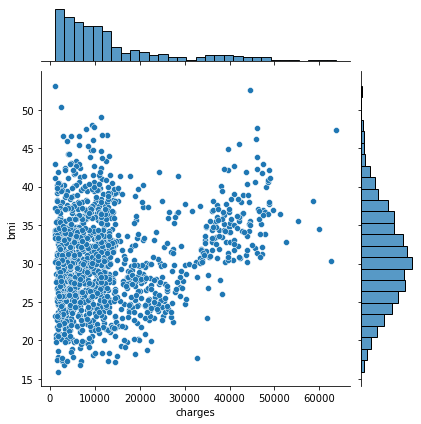

In [99]:
sns.jointplot(x=df_data_2["charges"], y=df_data_2["bmi"], kind='scatter')

plt.show()


In [100]:
def num_plot(x,c='g'):
    plt.figure(figsize=(16,8))
    sns.displot(df_data_2[x],color=c)
    plt.show()
    print(10*'-----',x,10*'-----')
    print('min:',df_data_2[x].min())
    print('max:',df_data_2[x].max())
    print('mean:',df_data_2[x].mean())
    
    

<Figure size 1152x576 with 0 Axes>

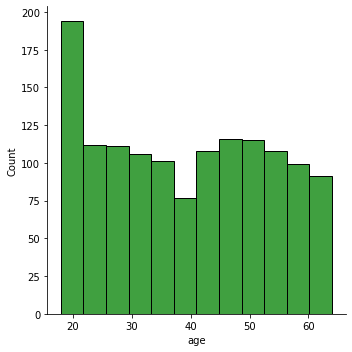

-------------------------------------------------- age --------------------------------------------------
min: 18
max: 64
mean: 39.20702541106129


In [101]:
num_plot('age')

<Figure size 1152x576 with 0 Axes>

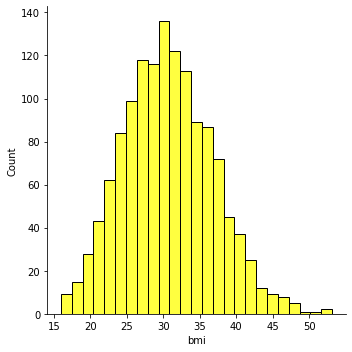

-------------------------------------------------- bmi --------------------------------------------------
min: 15.96
max: 53.13
mean: 30.66339686098655


In [102]:
num_plot('bmi','yellow')

<Figure size 1152x576 with 0 Axes>

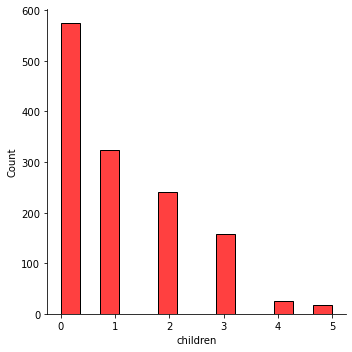

-------------------------------------------------- children --------------------------------------------------
min: 0
max: 5
mean: 1.0949177877429


In [103]:
num_plot('children','red')

<Figure size 1152x576 with 0 Axes>

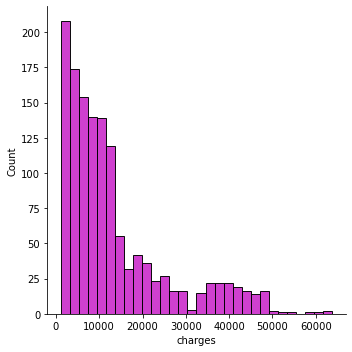

-------------------------------------------------- charges --------------------------------------------------
min: 1121.8739
max: 63770.42801
mean: 13270.422265141257


In [104]:
num_plot('charges',c='m')

In [105]:
def cat_plot(x):
  plt.figure(figsize=(16,8))
  sns.countplot(df_data_2[x])
  plt.show()
  print(df_data_2[x].value_counts(normalize=True))
  

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


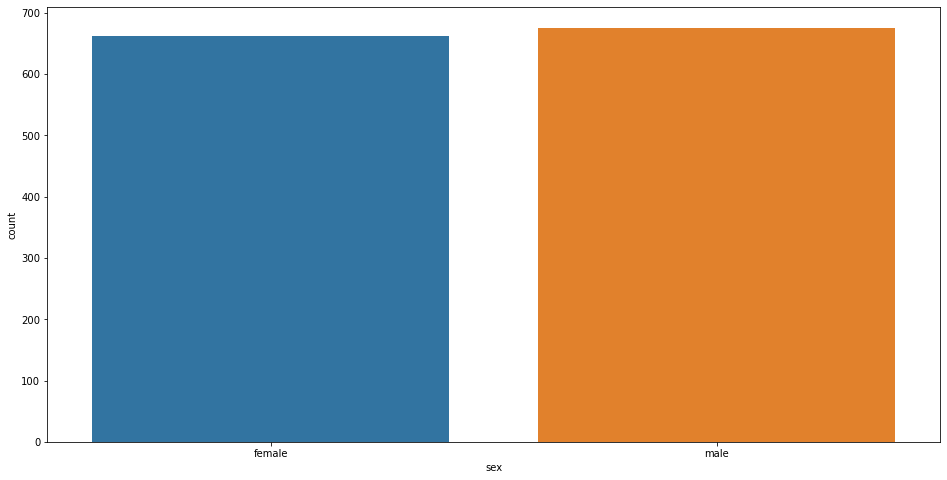

male      0.505232
female    0.494768
Name: sex, dtype: float64


In [106]:
 cat_plot('sex')

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


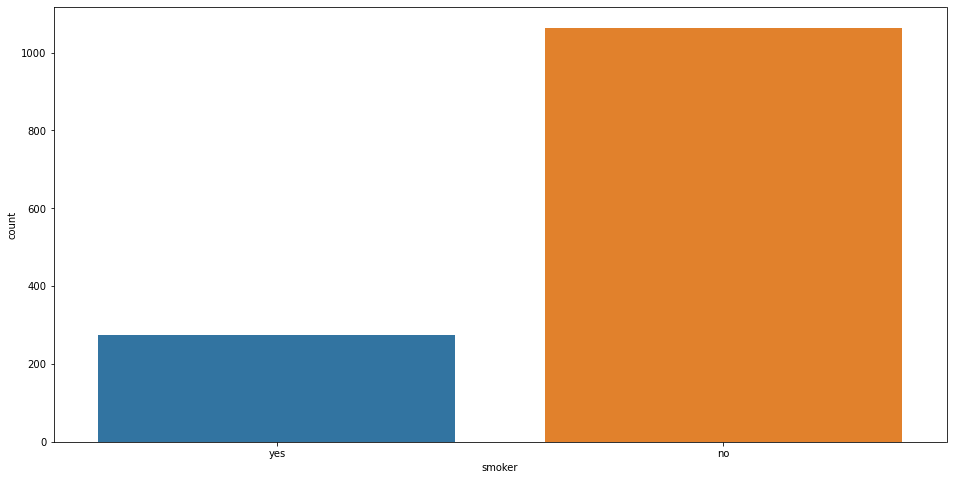

no     0.795217
yes    0.204783
Name: smoker, dtype: float64


In [107]:
cat_plot('smoker')

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


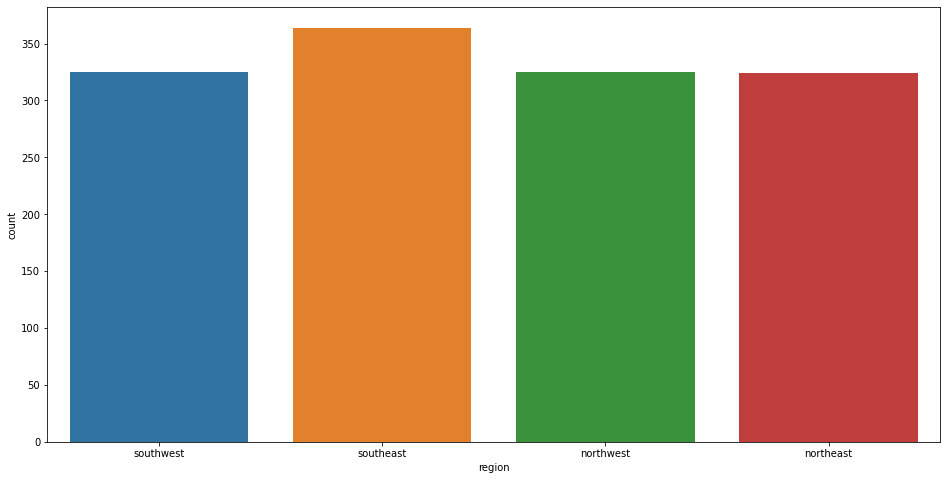

southeast    0.272048
northwest    0.242900
southwest    0.242900
northeast    0.242152
Name: region, dtype: float64


In [108]:
cat_plot('region')

# New section

In [109]:
ideal_bm=df_data_2[(df_data_2['bmi']>18)&(df_data_2['bmi']<=25)]
ideal_bm

,age,sex,bmi,children,smoker,region,charges
3,33,male,22.705,0,no,northwest,21984.47061
15,19,male,24.600,1,no,southwest,1837.23700
17,23,male,23.845,0,no,northeast,2395.17155
26,63,female,23.085,0,no,northeast,14451.83515
35,19,male,20.425,0,no,northwest,1625.43375
...,...,...,...,...,...,...,...
1304,42,male,24.605,2,yes,northeast,21259.37795
1306,29,female,21.850,0,yes,northeast,16115.30450
1314,30,female,23.655,3,yes,northwest,18765.87545
1316,19,female,20.600,0,no,southwest,1731.67700


In [110]:
df_data_2.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


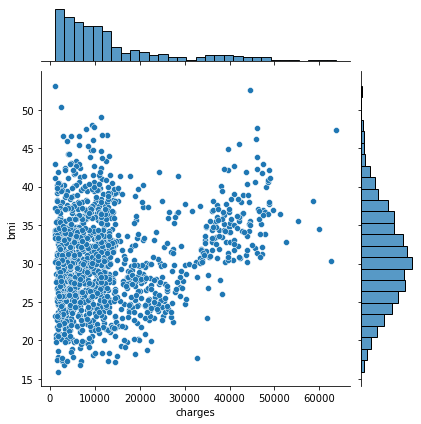

In [111]:
sns.jointplot(x=df_data_2["charges"], y=df_data_2["bmi"], kind='scatter')

plt.show()


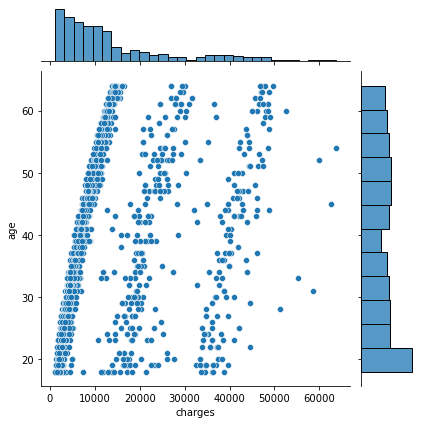

In [112]:
sns.jointplot(x=df_data_2["charges"], y=df_data_2["age"], kind='scatter')

plt.show()

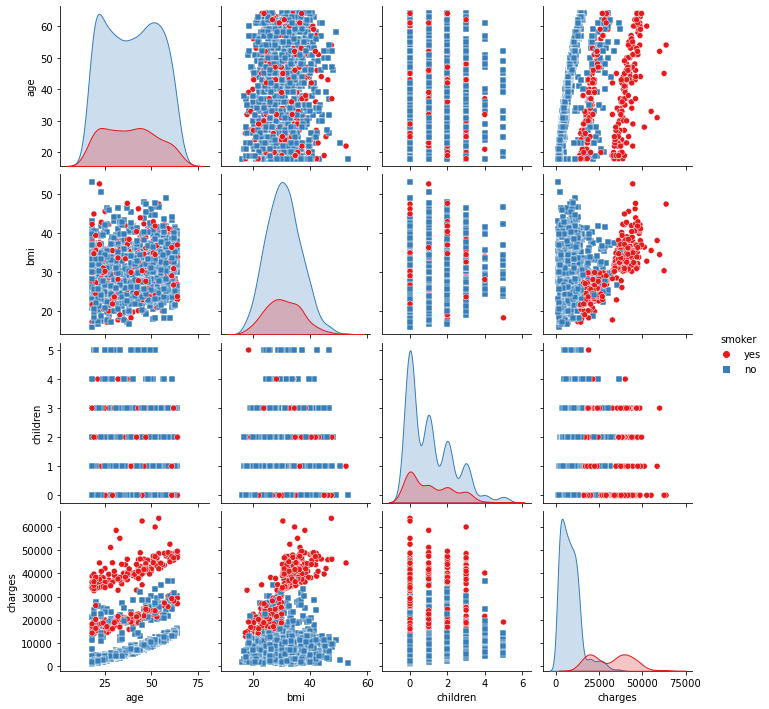

In [113]:
pplot=df_data_2[['age', 'bmi', 'children', 'smoker', 'charges']]
pplot.head()
sns.pairplot(pplot, kind="scatter", hue = "smoker" , markers=["o", "s"], palette="Set1")
plt.show()

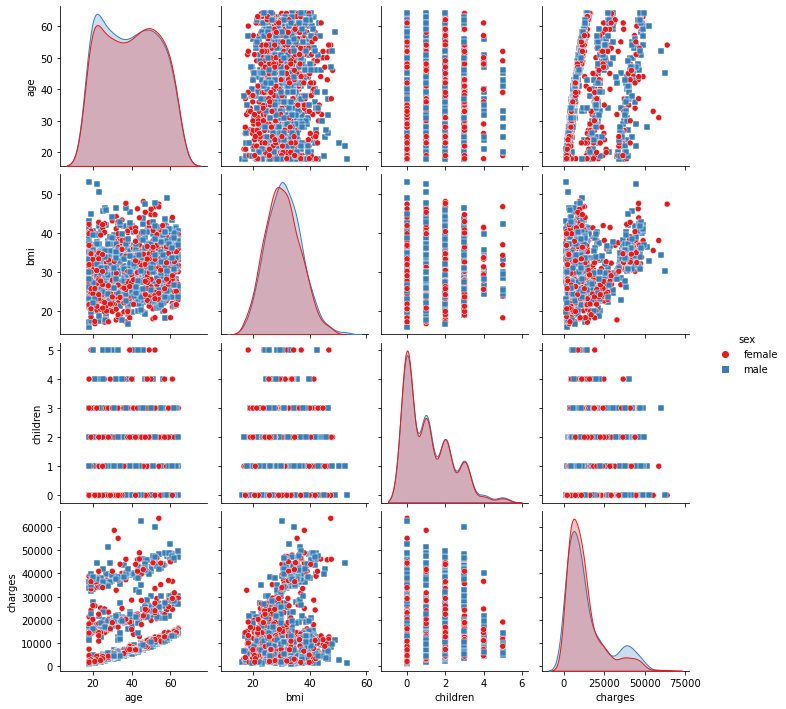

In [114]:
pplot=df_data_2[['age', 'bmi', 'children', 'sex', 'charges']]
pplot.head()
sns.pairplot(pplot, kind="scatter", hue = "sex" , markers=["o", "s"], palette="Set1")
plt.show()